In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# to put directly the labels on each curve
#! pip install matplotlib-label-lines
from labellines import labelLine, labelLines

In [3]:
def complet_x_y(x, y, min_v, max_v) :
    a = list(range(min_v, min(x)))
    b = list(range(max(x)+1, max_v+1))

    #b = list(range(max_v, max(x), -1))
    #b.reverse()

    return a + x + b, [min(y)]*len(a) + y + [max(y)]*len(b)

## 1

In [4]:
import pandas as pd 
import os

In [5]:
all_groups_names = [
"sgd",
"momentum",
"nesterov",
"asgd",
"rmsprop",
"rmsprop_mom",
"rprop",
"adadelta", 
"adagrad", 
"adam",
"amsgrad",
"adamax",
"custom_adam",
"adam_inverse_sqrt",
"adam_cosine",
"sag",
"sag_sgd",
"sag_adam",
]

In [6]:
dataset_name="iris"

classification = True
if dataset_name in ["boston", "diabete", "linnerud"] : classification = False

In [7]:
x_vars = ["train_epoch", "val_epoch"]
y_vars = ["train_loss", "val_loss"]
val_metric="val_loss"
L, C = 1, 2
indexes = [(0, 0), (0, 1)]

if classification :
    y_vars += ["train_acc", "val_acc"]
    val_metric="val_acc"
    L += 1
    indexes += [(1, 0), (1, 1)]

In [8]:
log_dir="../log_files"
log_path = os.path.join(log_dir, dataset_name)

In [9]:
all_groups_names = os.listdir(log_path) 
all_groups_names

['adadelta',
 'adagrad',
 'asgd',
 'momentum',
 'nesterov',
 'rmsprop',
 'rmsprop_mom',
 'rprop',
 'sgd']

In [16]:
# all_groups_names = [
# "adadelta", 
# "adagrad", 
# "sag",
# ]

all_groups_names = [
"sgd",
"momentum",
"nesterov",
"asgd",
#"sag",
#"sag_sgd",
]

# all_groups_names = [
# "rmsprop",
# "rmsprop_mom",
# "rprop",
# "sag",
# "sag_sgd",
# ]

# all_groups_names = [
# "adam",
# "amsgrad",
# "adamax",
# "sag",
# "sag_adam",
# ]

# all_groups_names = [
# "adam",
# "custom_adam",
# "adam_inverse_sqrt",
# "adam_cosine",
# "sag",
# "sag_sgd",
# "sag_adam",
# ]

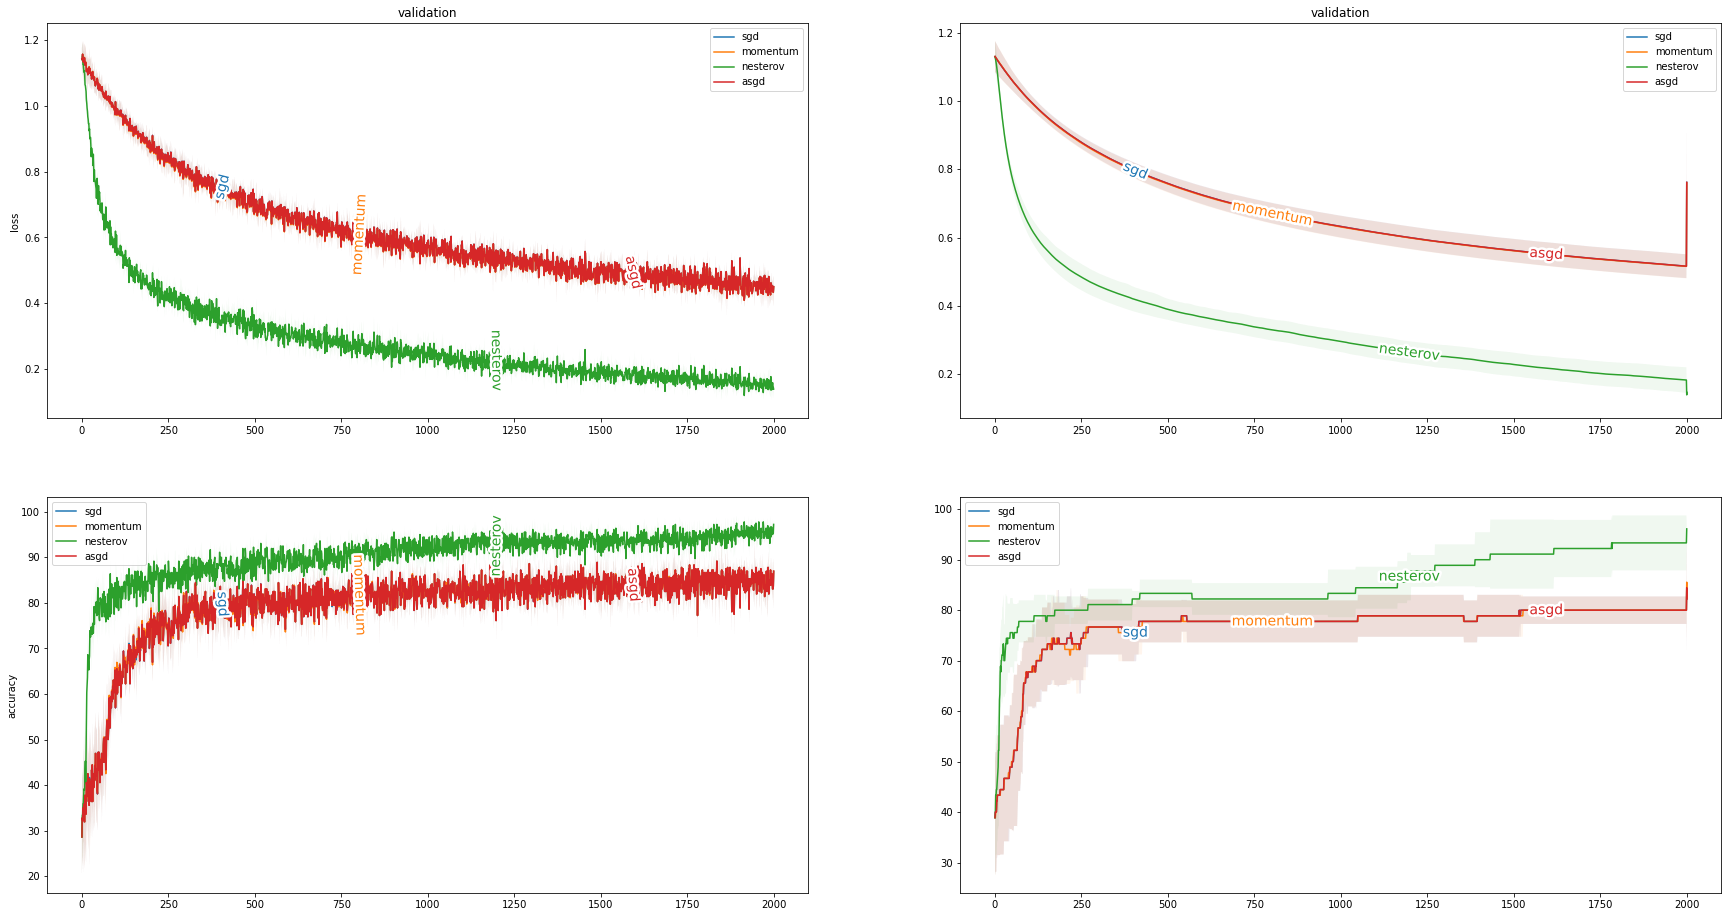

In [17]:
figsize=(C*15, L*8)
fig, axs = plt.subplots(L, C, sharex=False, sharey=False, figsize = figsize)
if L == 1 : axs = [axs]
#fig.suptitle("suptitle")

for name in all_groups_names :
    path = os.path.join(log_path, name) 

    for y_v, (i, j) in zip(y_vars, indexes) :
        x_v = "train_epoch" if 'train' in y_v else "val_epoch"
        ax = axs[i][j]

        x, y = [], []
        for dir_name in os.listdir(path) :
            log_file = os.path.join(path, dir_name, "csv_logs/version_0/metrics.csv")
            hist = pd.read_csv(log_file)
            df = hist[[x_v, y_v]].dropna()
            x.append([int(k) for k in df[x_v].values])
            y.append(df[y_v].values.tolist())

        min_v, max_v = np.infty, 0
        for k in range(len(x)):
            min_v = min(min_v, min(x[k]))
            max_v = max(max_v, max(x[k]))

        for k in range(len(x)) :
            x[k], y[k] = complet_x_y(x[k], y[k], min_v, max_v)

        if False :
            ax.plot(x[0], y[0], label=name)
        else :
            #x = x[0]
            x = np.array(x).mean(axis=0)

            y = np.array(y)
            std = y.std(axis=0)
            y = y.mean(axis=0)

            ax.plot(x, y, label=name)
            ax.fill_between(x, y - std, y + std, alpha=0.07, interpolate=True)

    #break

for y_v, (i, j) in zip(y_vars, indexes) :
    x_v = "train_epoch" if 'train' in y_v else "val_epoch"
    ax = axs[i][j]

    # ax.set(xlabel=x_v, ylabel=y_v)
    # #ax.set_title(y_v)

    if j==0 : ax.set(ylabel="loss" if 'loss' in y_v else "accuracy")
    if i==0 : ax.set_title("train" if 'training' in y_v else "validation")

    ax.legend()

    _ = labelLines(ax.get_lines(), zorder=2.5, fontsize=14, align=True)

#### stats

In [ ]:
# df = pd.DataFrame.from_dict({
#     "x" : [1, 2, 3],
#     "y" : [1, 4, 3]
# })

# index = df["y"].argmax()
# entry = df.iloc[index]
# a, b = entry.values

# k, a, b

In [13]:
stat_collector = {}

for y_v in y_vars :
    stat_collector[y_v] = {}
    stat_collector[y_v]["x"] = {}
    stat_collector[y_v]["y"] = {}

In [14]:

for name in all_groups_names :
    path = os.path.join(log_path, name) 
    for y_v in y_vars :
        x_v = "train_epoch" if 'train' in y_v else "val_epoch"
        x, y = [], []
        for dir_name in os.listdir(path) :
            log_file = os.path.join(path, dir_name, "csv_logs/version_0/metrics.csv")
            hist = pd.read_csv(log_file)
            df = hist[[x_v, y_v]].dropna()

            index = df[y_v].argmin() if 'loss' in y_v else df[y_v].argmax()
            entry = df.iloc[index]

            x.append(entry[0])
            y.append(entry[1])

        x = np.array(x)
        x_std = x.std()
        x_mean = x.mean()

        y = np.array(y)
        y_std = y.std()
        y_mean = y.mean()

        stat_collector[y_v]["x"][name] = [x_mean, x_std]
        stat_collector[y_v]["y"][name] = [y_mean, y_std]

In [18]:
y_v = y_vars[0]
metric = "x"
data = stat_collector[y_v][metric]
data

{'momentum': [1942.6666666666667, 55.63172556095028],
 'nesterov': [1856.0, 122.98238356230809],
 'asgd': [1942.6666666666667, 55.63172556095028]}

In [49]:
# data = {
#     "sgd" : [0.53, 0.4],
#     "momentum" : [0.15, 0.4],
#     "nesterov" : [0.55, 0.4],
#     "asgd" : [0.50, 0.5]
# }

In [60]:
save_path = "../images/toy_problem/" + dataset_name
os.makedirs(save_path, exist_ok=True)

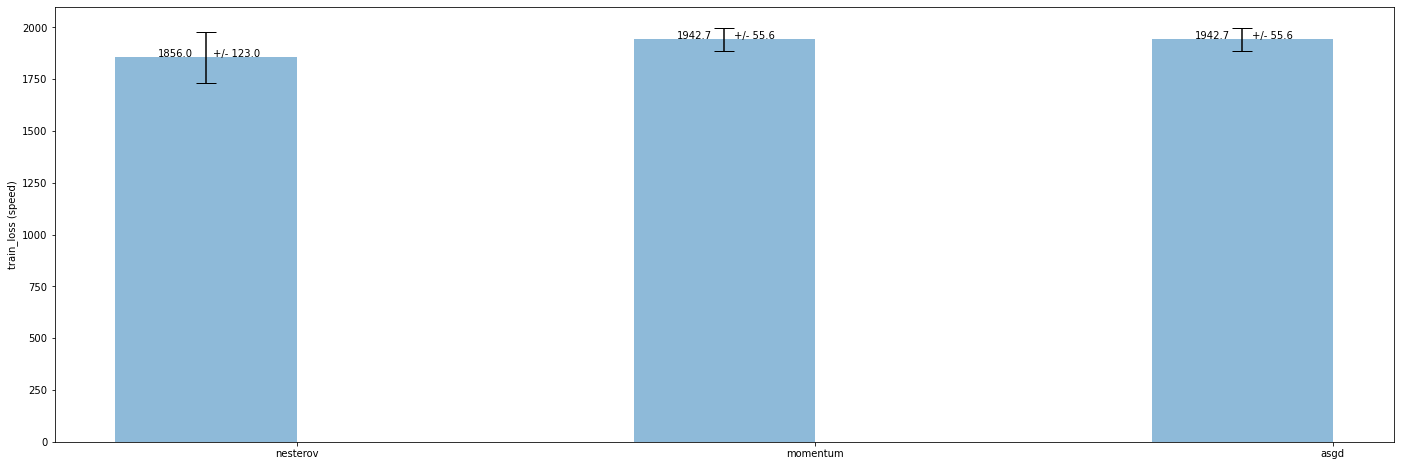

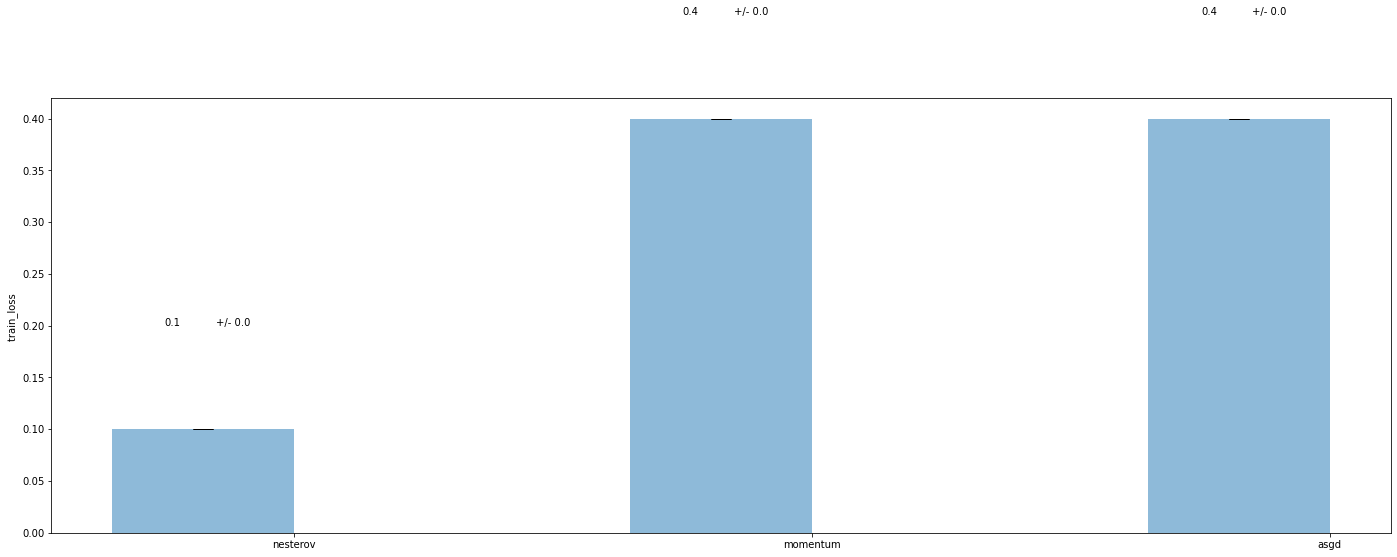

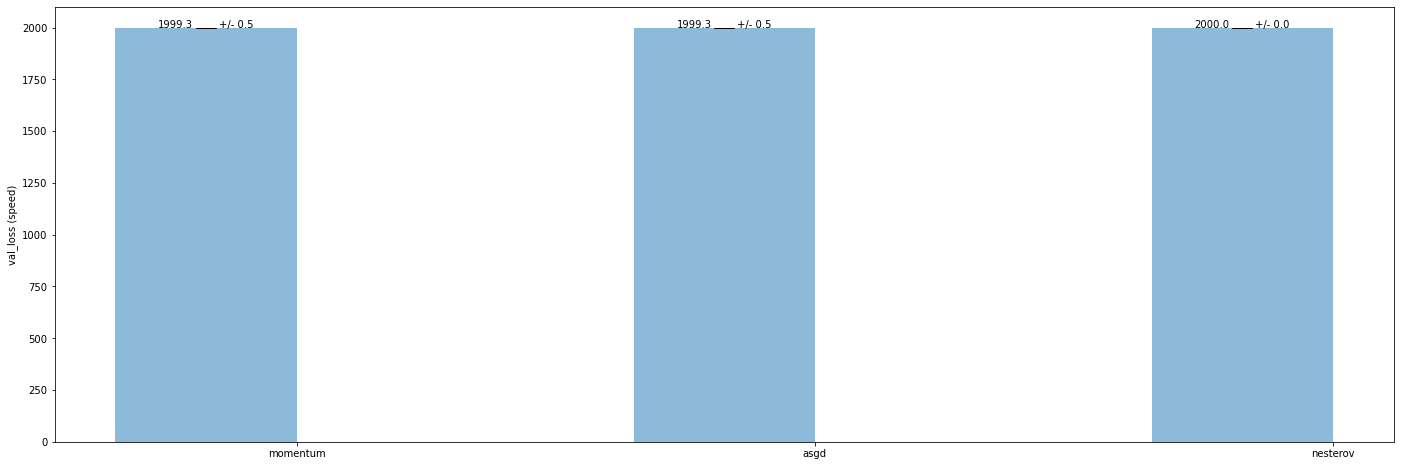

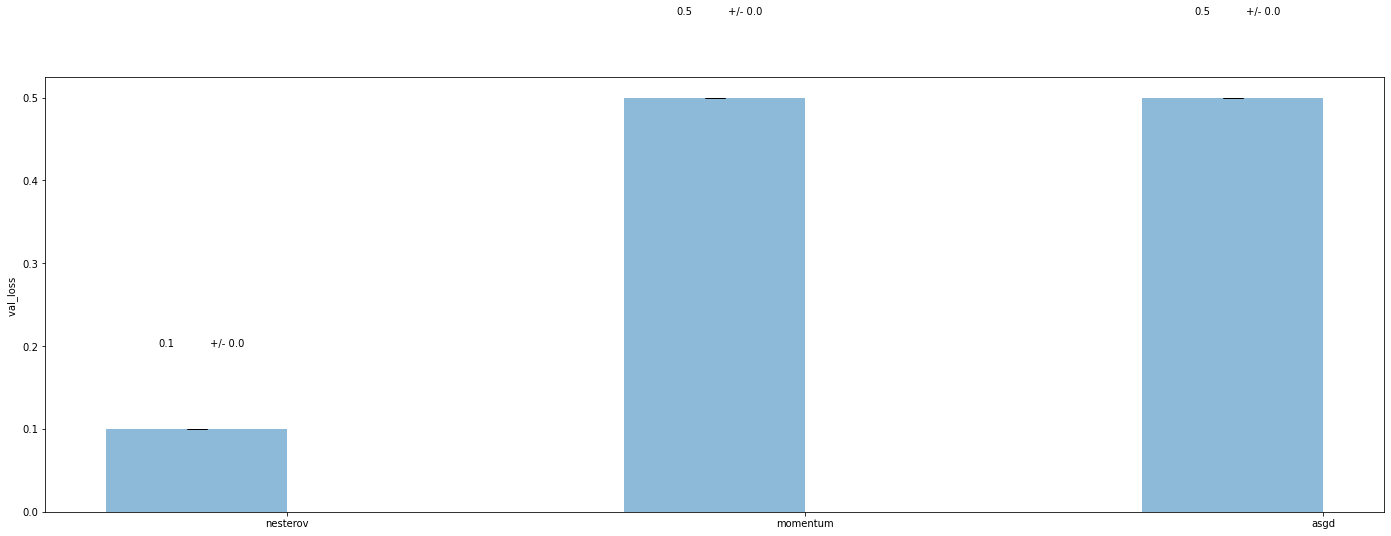

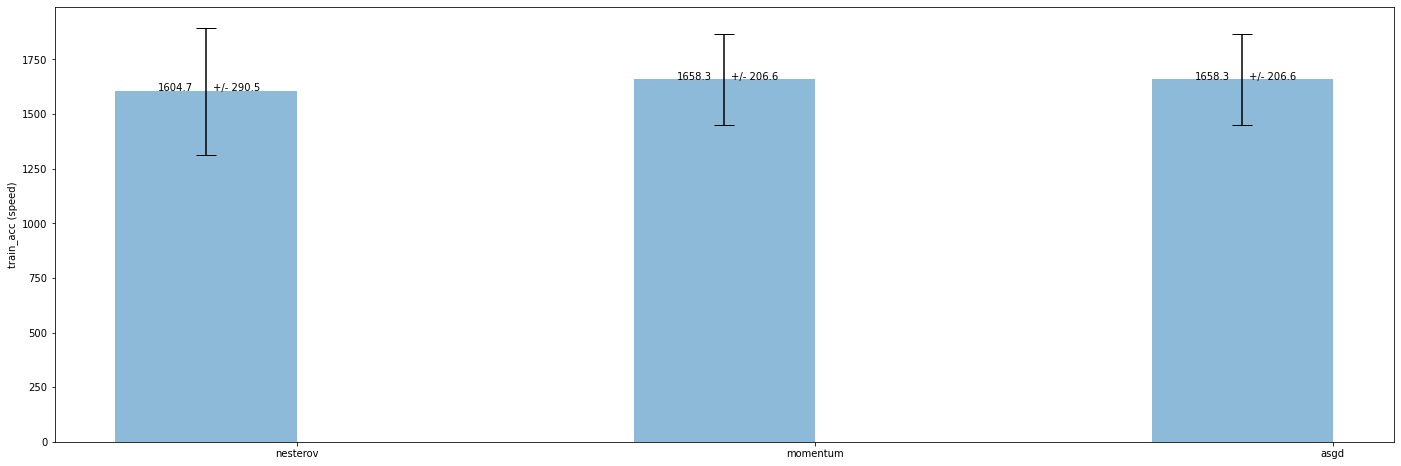

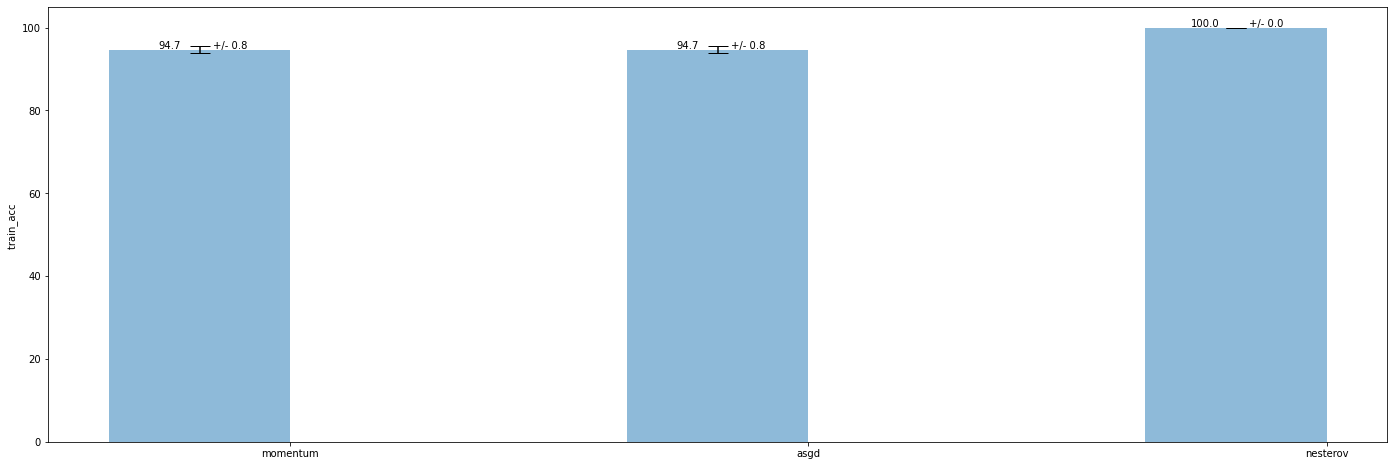

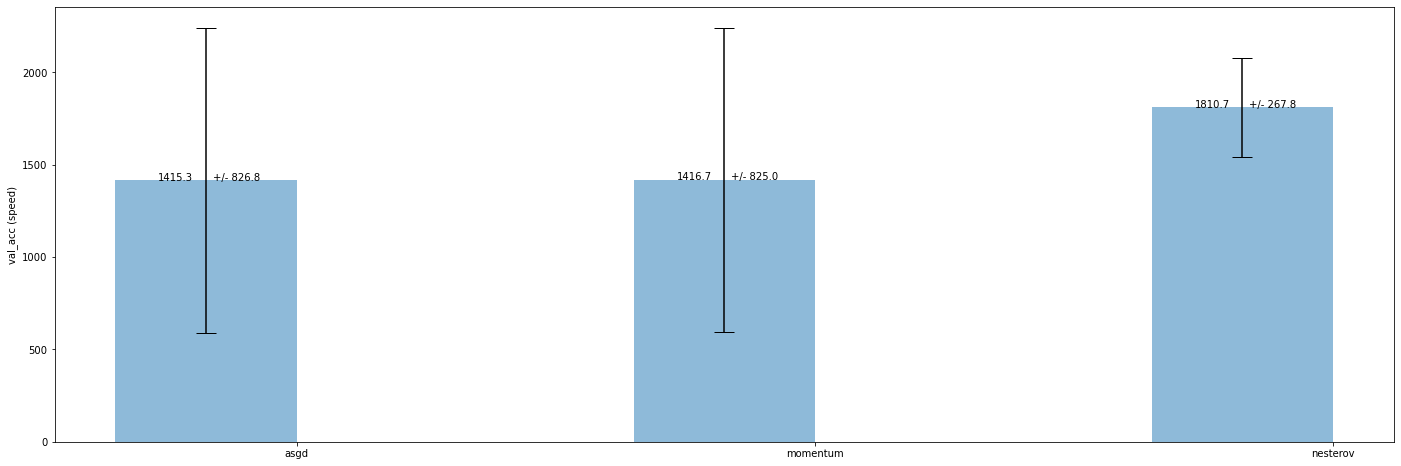

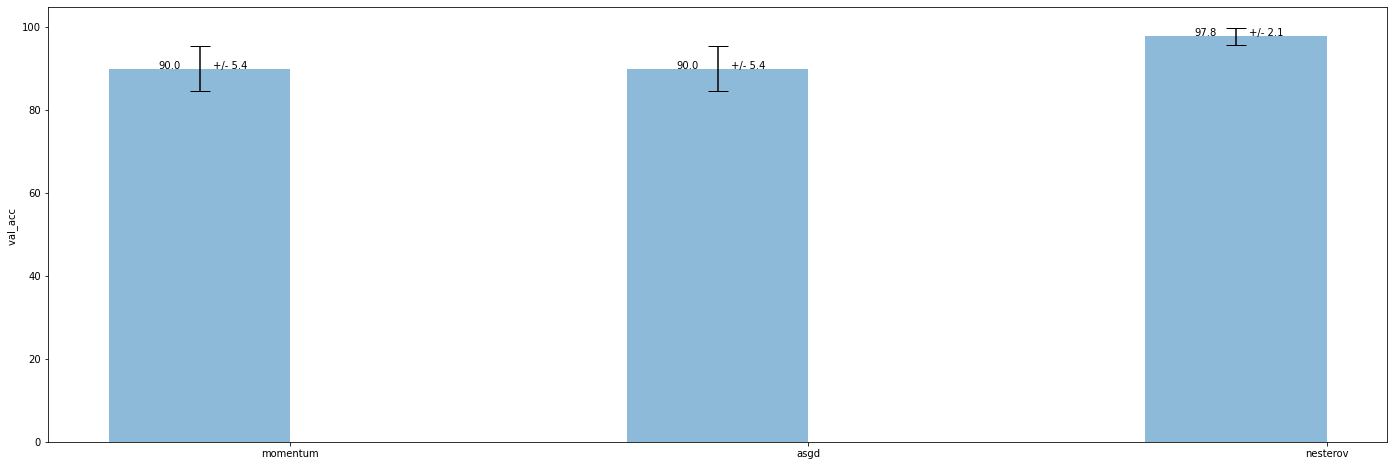

In [63]:
for y_v in y_vars :
    # stat_collector[y_v] = {}
    # stat_collector[y_v]["x"] = {}
    # stat_collector[y_v]["y"] = {}
    for metric in ["x", "y"] :
        data = stat_collector[y_v][metric]

        tmp = {k : v[0] for k, v in data.items()}
        tmp = {k: round(v, 1) for k, v in sorted(tmp.items(), key=lambda item: item[1])}
        error  = [round(data[k][1], 1) for k in tmp.keys()]
        methods = list(tmp.keys())
        speed = list(tmp.values())

        loc = np.arange(len(methods)) # the label locations
        width = 0.35 # the width of the bars

        #fig, ax = plt.subplots()
        figsize=(4*6,4*2)
        fig, ax = plt.subplots(1, 1, sharex=False, sharey=False, figsize = figsize)

        ax.set_ylabel('{} {}'.format(y_v, "(speed)" if metric=="x" else ""))
        #ax.set_title('optimizers')
        ax.set_xticks(loc)
        ax.set_xticklabels(methods)
        pps = ax.bar(loc, speed, width, label='', yerr=error, align='center', alpha=0.5, capsize=10)
        #pps = ax.bar(loc, speed, width, label='', yerr=error, align='center', alpha=0.5, capsize=10)
        for k, p in enumerate(pps):
            height = p.get_height()

            s = "{}".format(height)
            ss = p.get_x() + 1 * p.get_width() / 3
            ax.text(x=ss, y=height+.10, s=s, ha='center')

            s = "+/- {}".format(error[k])
            ss = p.get_x() + 2 * p.get_width() / 3
            ax.text(x=ss, y=height+.10, s=s, ha='center')
        plt.show()

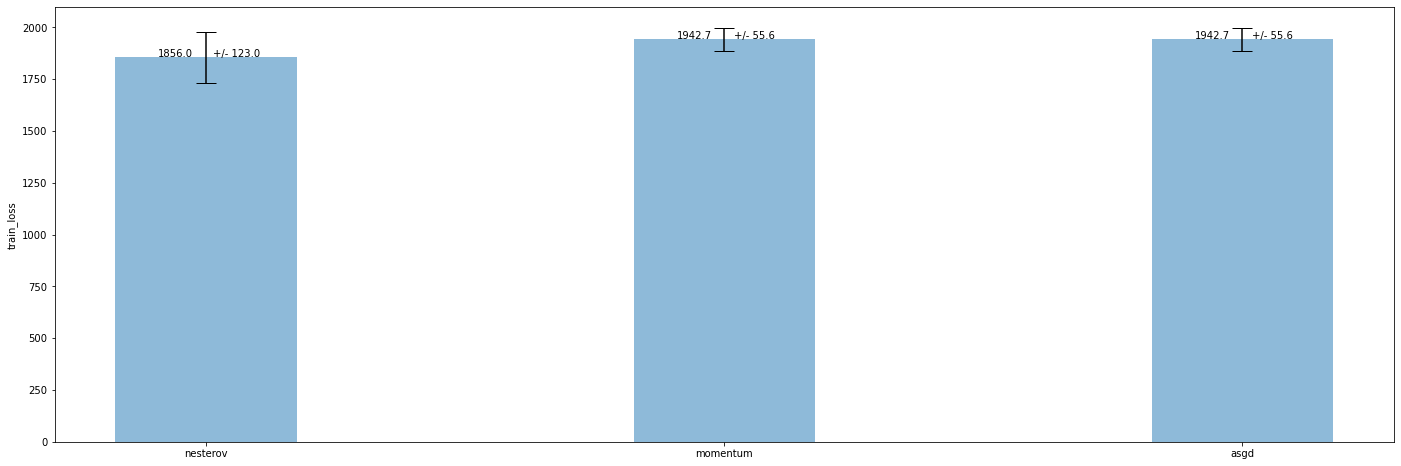

In [51]:
tmp = { k : v[0] for k, v in data.items()}
tmp = {k: round(v, 1) for k, v in sorted(tmp.items(), key=lambda item: item[1])}
error  = [round(data[k][1], 1) for k in tmp.keys()]
methods = list(tmp.keys())
speed = list(tmp.values())

loc = np.arange(len(methods)) # the label locations
width = 0.35 # the width of the bars

#fig, ax = plt.subplots()
figsize=(4*6,4*2)
fig, ax = plt.subplots(1, 1, sharex=False, sharey=False, figsize = figsize)

ax.set_ylabel(y_v)
#ax.set_title('optimizers')
ax.set_xticks(loc)
ax.set_xticklabels(methods)
pps = ax.bar(loc, speed, width, label='', yerr=error, align='center', alpha=0.5, capsize=10)
for k, p in enumerate(pps):
    height = p.get_height()

    s = "{}".format(height)
    ss = p.get_x() + 1 * p.get_width() / 3
    ax.text(x=ss, y=height+.10, s=s, ha='center')

    s = "+/- {}".format(error[k])
    ss = p.get_x() + 2 * p.get_width() / 3
    ax.text(x=ss, y=height+.10, s=s, ha='center')
plt.show()

## 2

In [264]:
#!pip install wandb

In [265]:
! wandb login 4b0f686604f1a6abf8bb58c61bdc099bbaca87be

wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\Pascal/.netrc


In [266]:
import wandb
wandb_api = wandb.Api(timeout=60*45)

In [267]:
wandb_entity="ift6512"

In [268]:
opt="adam"
dataset_name="iris"
weight_decay=0.0
lr=0.001
dropout=0.1

In [269]:
wandb_project=f"{dataset_name}-wd={weight_decay}-lr={lr}-d={dropout}"

runs = wandb_api.runs(f"{wandb_entity}/{wandb_project}") 

In [270]:
all_groups = {}
for run in runs: 
    g = run.group
    all_groups[g] = all_groups.get(g, []) + [run] 

all_groups_names = list(all_groups.keys())
all_groups_names

['asgd', 'nesterov', 'momentum', 'sgd']

In [271]:
# all_groups_names = [
# "sgd",
# "momentum",
# "nesterov",
# "asgd",
# "rmsprop",
# "rmsprop_mom",
# "rprop",
# "adadelta", 
# "adagrad", 
# "adam",
# "amsgrad",
#  "adamax",
# "custom_adam",
# "adam_inverse_sqrt",
# "adam_cosine",
# "sag",
# "sag_sgd",
# "sag_adam",
# ]

In [272]:
x_vars = ["train_epoch", "val_epoch"]
y_vars = ["train_loss", "val_loss"]
L, C = 1, 2
indexes = [(0, 0), (0, 1)]

y_vars += ["train_acc", "val_acc"]
L += 1
indexes += [(1, 0), (1, 1)]

In [ ]:
figsize=(C*15, L*8)
fig, axs = plt.subplots(L, C, sharex=False, sharey=False, figsize = figsize)
if L == 1 : axs = [axs]
#fig.suptitle("suptitle")

for name in all_groups_names :
    for y_v, (i, j) in zip(y_vars, indexes) :
        x_v = "train_epoch" if 'train' in y_v else "val_epoch"
        ax = axs[i][j]

        x, y = [], []
        for run in all_groups[name]:
            hist = run.history()
            df = hist[[x_v, y_v]].dropna()
            x.append([int(k) for k in df[x_v].values])
            y.append(df[y_v].values.tolist())

        min_v, max_v = np.infty, 0
        for k in range(len(x)):
            min_v = min(min_v, min(x[k]))
            max_v = max(max_v, max(x[k]))

        for k in range(len(x)) :
            x[k], y[k] = complet_x_y(x[k], y[k], min_v, max_v)

        if True :
            ax.plot(x[0], y[0], label=name)
        else :
            #x = x[0]
            x = np.array(x).mean(axis=0)

            y = np.array(y)
            std = y.std(axis=0)
            y = y.mean(axis=0)

            ax.plot(x, y, label=name)
            ax.fill_between(x, y - std, y + std)


    #break

for y_v, (i, j) in zip(y_vars, indexes) :
    x_v = "train_epoch" if 'train' in y_v else "val_epoch"
    ax = axs[i][j]

    # ax.set(xlabel=x_v, ylabel=y_v)
    # #ax.set_title(y_v)

    if j==0 : ax.set(ylabel="loss" if 'loss' in y_v else "accuracy")
    if i==0 : ax.set_title("train" if 'training' in y_v else "validation")

    ax.legend()

    _ = labelLines(ax.get_lines(), zorder=2.5, fontsize=14, align=True)